In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# df=pd.read_csv("../data/initial_urls.csv")
# df2=pd.read_csv("../data/additional_urls.csv") #reading datas
df = pd.read_csv("/content/drive/MyDrive/ML-Phishing Detection Project/old/data/initial_urls.csv")
df2 = pd.read_csv("/content/drive/MyDrive/ML-Phishing Detection Project/old/data/additional_urls.csv")

print(df.head())   #display first 5 rows...
print(df2.head())   #display first 5 rows...

def initial_read(df):
    print('SHAPE')
    print(df.shape) #display no of rows and columns
    print('-------')
    print('DTYPES')
    print(df.dtypes) #data types of different columns
    print('-------')
    print('NULL VALUES')
    print(df.isnull().sum()) #display sum of total null valued rows of each columns
    print('-------')
#initial_read(df)
#initial_read(df2)
df.dropna(inplace=True) #modifies the data by removing the rows having null value. i.e, rows without having a label of df
#print(df.isnull().sum())
df2.drop(columns = ['Unnamed: 0', 'label'], inplace=True) #dropping 2 unwanted columns of df2...unnamed and label.
#print(df2.head())
df['label']=df['label'].astype(int) #changing float dtype of label to int
#print(df.dtypes)
df.rename(columns={"domain": "url", "label": "phishing"},inplace=True) #changing column names to url and phishing of df
#print(df.columns)
df2.rename(columns={"result": "phishing"},inplace=True) #changing column name result to phishing of df2
#print(df2.head())
df['url']= 'https://' + df['url'].astype(str) #adding protocols to urls
#print(df.head())

df_final = pd.concat([df,df2]) #concatenate df and df2
#initial_read(df_final)
#print(df_final[df_final.duplicated()])
df_final .drop_duplicates(inplace=True) #drop duplicate rows..
#print(df_final[df_final.duplicated()])

# df_final.to_csv('../data/final_urls.csv', index=False) #save final/cleaned dataset to final_urls.csv
path = '/content/drive/My Drive/ML-Phishing Detection Project/data/final_urls.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_final.to_csv(f,index=False)

print(df.columns)
print(df2.columns)
print(f" \nnew dataset Length:     {len(df_final)}")

                                              domain  label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...    1.0
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...    1.0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....    1.0
3  mail.printakid.com/www.online.americanexpress....    1.0
4  thewhiskeydregs.com/wp-content/themes/widescre...    1.0
   Unnamed: 0                        url   label  result
0           0     https://www.google.com  benign       0
1           1    https://www.youtube.com  benign       0
2           2   https://www.facebook.com  benign       0
3           3      https://www.baidu.com  benign       0
4           4  https://www.wikipedia.org  benign       0
Index(['url', 'phishing'], dtype='object')
Index(['url', 'phishing'], dtype='object')
 
new dataset Length:     545895


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


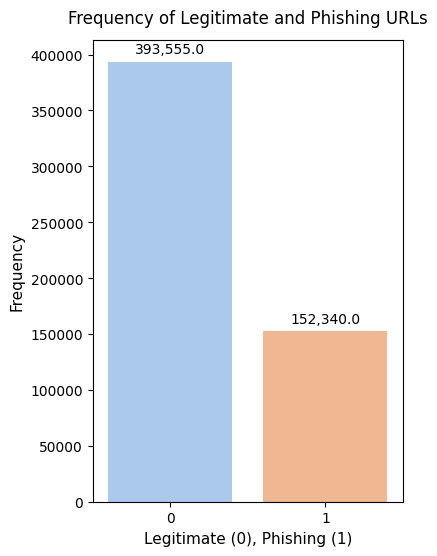

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# df = pd.read_csv("../data/final_urls.csv")
df = pd.read_csv("/content/drive/MyDrive/ML-Phishing Detection Project/data/final_urls.csv")


plt.figure(figsize = (4, 6))
bar = sns.countplot(x=df["phishing"],
              data=df,
              palette="pastel")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 12, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 11)
plt.ylabel("Frequency",fontsize = 11)
plt.show()